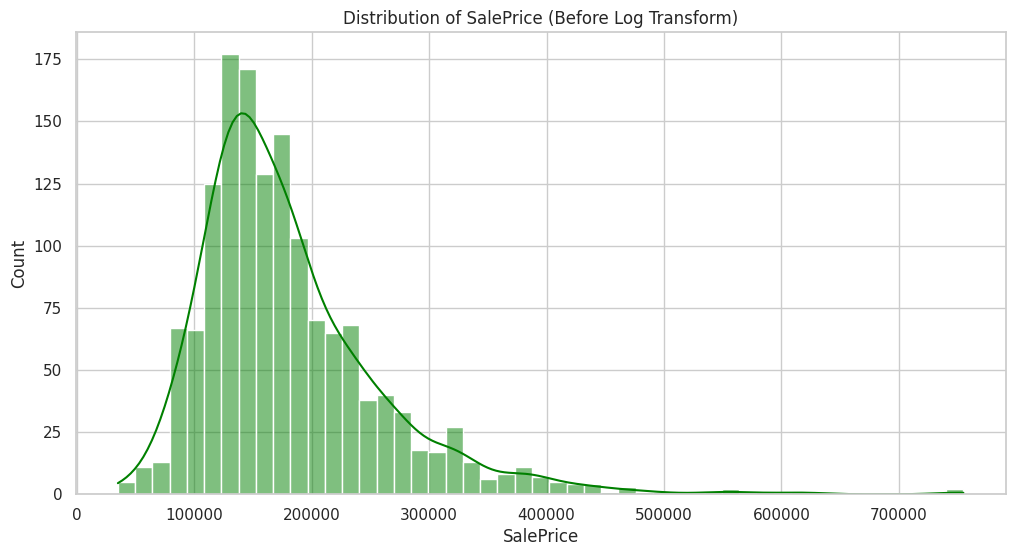

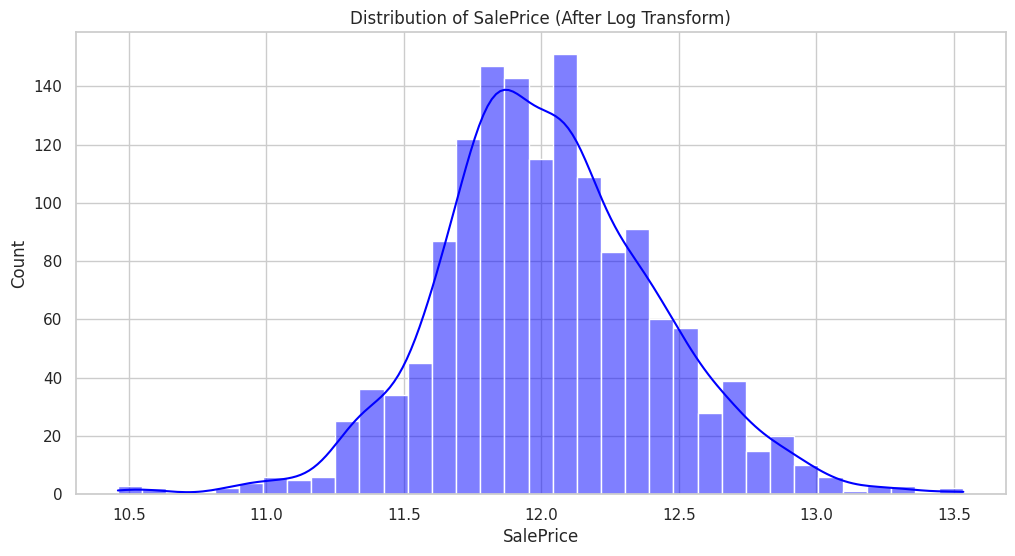

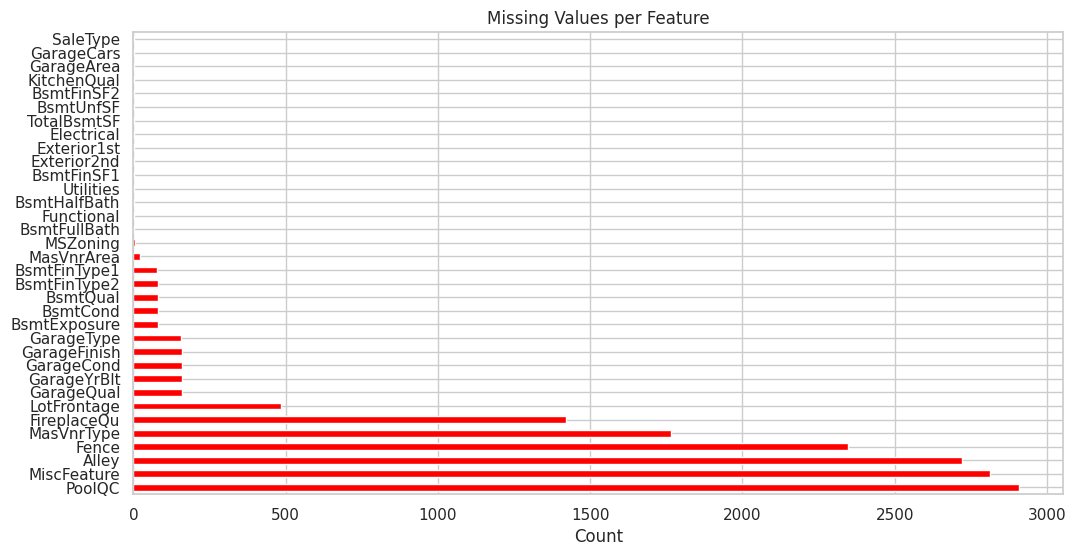

/tmp/ipython-input-18-3161569505.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


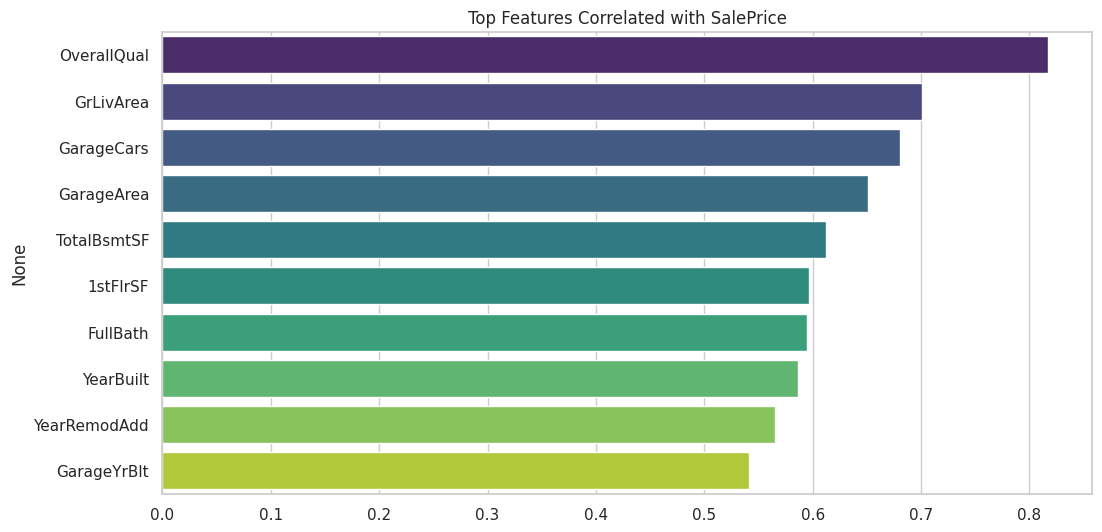

✅ Data Preprocessing Complete
X_train shape: (1460, 79)
y shape: (1460,)
X_test shape: (1459, 79)


In [18]:
#  Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#  Loading  Dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Backup test ID
test_ID = test['Id']
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

#  Visualize Target Variable
sns.histplot(train['SalePrice'], kde=True, color="green")
plt.title("Distribution of SalePrice (Before Log Transform)")
plt.show()

# Log-transform SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train["SalePrice"]

# Plot after log transform
sns.histplot(train['SalePrice'], kde=True, color="blue")
plt.title("Distribution of SalePrice (After Log Transform)")
plt.show()

# Combine train and test for processing
all_data = pd.concat([train.drop("SalePrice", axis=1), test], axis=0)

# Visualize missing data
missing = all_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.plot(kind='barh', color='red')
plt.title("Missing Values per Feature")
plt.xlabel("Count")
plt.show()

#  Missing Values

mode_fill_cols = ['MSZoning', 'Functional', 'Utilities', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in mode_fill_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

num_cols = all_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].median())

none_fill_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'MasVnrType']
for col in none_fill_cols:
    all_data[col] = all_data[col].fillna("None")

all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(0)

# Feature Engineering

# Convert numerical categorical to strings
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

# Label Encoding for ordinal features
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
                    'PoolQC']
for col in ordinal_features:
    lbl = LabelEncoder()
    all_data[col] = lbl.fit_transform(all_data[col])

# Visualize correlation with SalePrice
corr_matrix = train.select_dtypes(include=[np.number]).corr()
top_corr = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False).head(10)
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top Features Correlated with SalePrice")
plt.show()




#  Feature Scaling for numeric columns
scaler = StandardScaler()
scaled_cols = all_data.select_dtypes(include=['int64', 'float64']).columns
all_data[scaled_cols] = scaler.fit_transform(all_data[scaled_cols])

# Split to train and test
X_train = all_data[:len(train)]
X_test = all_data[len(train):]

#  Print shapes
print("✅ Data Preprocessing Complete")
print("X_train shape:", X_train.shape)
print("y shape:", y.shape)
print("X_test shape:", X_test.shape)
